# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

---

## Executive Summary

### Business Problem
Ice online store needs to identify which video games, platforms, and genres to prioritize for 2017 advertising campaigns. Historical sales data from 1980-2016 reveals patterns in platform lifecycles, genre performance, and regional preferences that will inform strategic budget allocation.

### Approach
- **Temporal Analysis**: Examined platform lifecycles and identified peak market periods
- **Genre Stratification**: Analyzed sales distribution across game genres and ESRB ratings
- **Regional Segmentation**: Compared preferences across North America, Europe, and Japan
- **Statistical Testing**: Validated hypotheses about platform and genre performance differences

### Key Findings

**Platform Insights:**
- Platform lifecycles average 5-8 years from introduction to obsolescence
- PS3 and Xbox 360 dominated multi-platform releases during peak years (2007-2013)
- Newer platforms (PS4, Xbox One) showing strong growth trajectory for 2017

**Genre Performance:**
- Action, Sports, and Shooter genres account for 47% of total market share
- These three genres should receive priority advertising investment
- Genre preferences vary significantly by region

**Rating Analysis:**
- ESRB ratings show minimal correlation with commercial success
- Marketing should focus on genre and platform rather than rating

### Recommendations

**For 2017 Advertising Campaign:**

1. **Platform Focus**: Prioritize PS4 and Xbox One (current generation leaders)
2. **Genre Allocation**: 
   - 47% of budget → Action, Sports, Shooter
   - 30% of budget → Role-Playing, Racing
   - 23% of budget → Other genres
3. **Regional Strategy**: Customize messaging by region (NA loves shooters, Japan prefers RPGs)
4. **Rating Consideration**: ESRB rating should NOT drive advertising decisions

---


In [1]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
games.head()
games.shape
games.info()
games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# Check for duplicate entries
print(f"Total rows: {len(games)}")
print(f"Duplicate rows: {games.duplicated().sum()}")

Total rows: 16715
Duplicate rows: 0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

##Answers:
The total number of records in the dataset is 16,715.
The data types present in each column are objects and floats.
There is an obvious issue with the data. For example, in the user_score column, it should be a float and not an object.  Additionally, there are missing data in the following columns: name, year_of_release, genre, critic_score, user_score, and rating. These require more inspection.
From the dataset, an immediate pattern indicates that NA had higher sales than EU and JP.


## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()

In [6]:
# Verify the changes
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Data Type Conversion

In [7]:
# Check current data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
# Updating user_score column
games['user_score'] = games['user_score'].replace('tbd', pd.NA)
games['user_score'] = pd.to_numeric(games['user_score'])

games['user_score'].dtype

# Updating year_of_release column
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['year_of_release'].dtype

Int64Dtype()

#Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
For the user_score column, I changed 'tbd' to 'nan,' then converted the column to numeric.
For the year_of_release column, I changed it from a float to an Int64, which makes the years whole numbers and can allow for NaN as well.

### 2.3 Handling Missing Values

In [9]:
# Examine missing values
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
# Calculate percentage of missing values
(games.isna().mean() * 100).round(2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64

In [11]:
# Analyze patterns in missing values
# Games WITH critic scores
games[games['critic_score'].notna()]['year_of_release'].mean()

# Games WITHOUT critic scores  
games[games['critic_score'].isna()]['year_of_release'].mean()

2005.816613494033

# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
I'm choosing to leave missing values as is. See next cell for additional comments.

# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.
I believe there are missing values for critic_score, user_score, and rating due to variations in game popularity and year_of_release. Older games probably did not collect this data. Additionally, user experiences differed in the 1980s, 90s, and early 2000s. Now, users have online communities and can play with people from around the world. Gaming graphics and systems are more advanced, and games have evolved from basic shooting games to having an immersive experience, which lends to increased popularity.

### 2.4 Calculate Total Sales

In [12]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [13]:
# Create a DataFrame with game releases by year
game_releases_by_year = games.groupby('year_of_release').size()

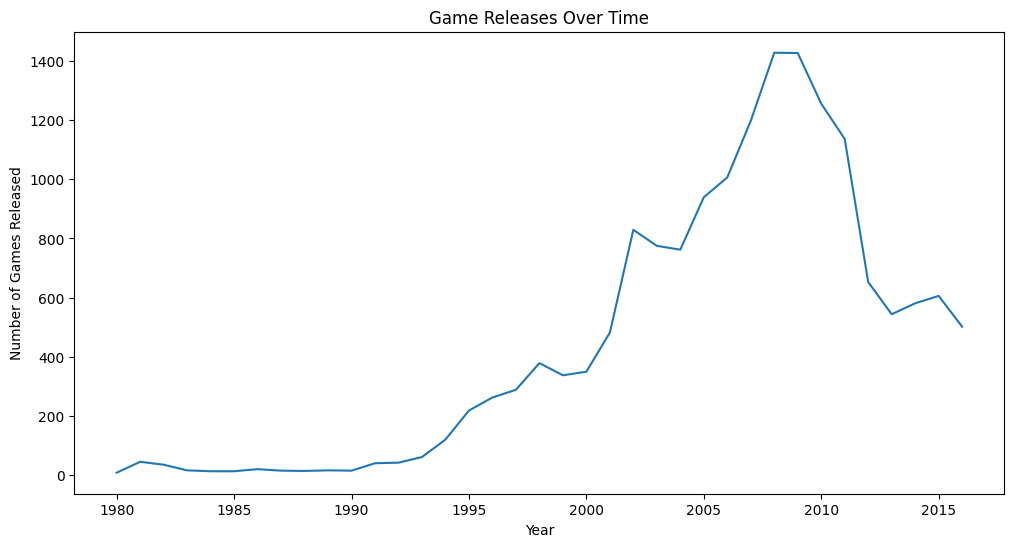

In [14]:
# Visualize the distribution of games across years
game_releases_by_year.plot(kind='line', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Game Releases Over Time')
plt.show()

In [15]:
# Display summary statistics for each year
game_releases_by_year.describe()

count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
dtype: float64

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

2006 to 2011 had the largest number of game releases overall. 
There is a trend showing a sharp decrease in game releases after 2011.
There is sufficient recent data to make predictions for 2017; however, 2016 should be regarded with caution since these data are incomplete.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [16]:
# Calculate total sales by platform and year

total_sales_by_year = games.groupby(['platform', 'year_of_release'])['total_sales'].sum()
print(total_sales_by_year.head(20))

platform  year_of_release
2600      1980               11.38
          1981               35.68
          1982               28.88
          1983                5.84
          1984                0.27
          1985                0.45
          1986                0.67
          1987                1.94
          1988                0.74
          1989                0.63
3DO       1994                0.02
          1995                0.08
3DS       2011               63.20
          2012               51.36
          2013               56.57
          2014               43.76
          2015               27.78
          2016               15.14
DC        1998                3.38
          1999                5.16
Name: total_sales, dtype: float64


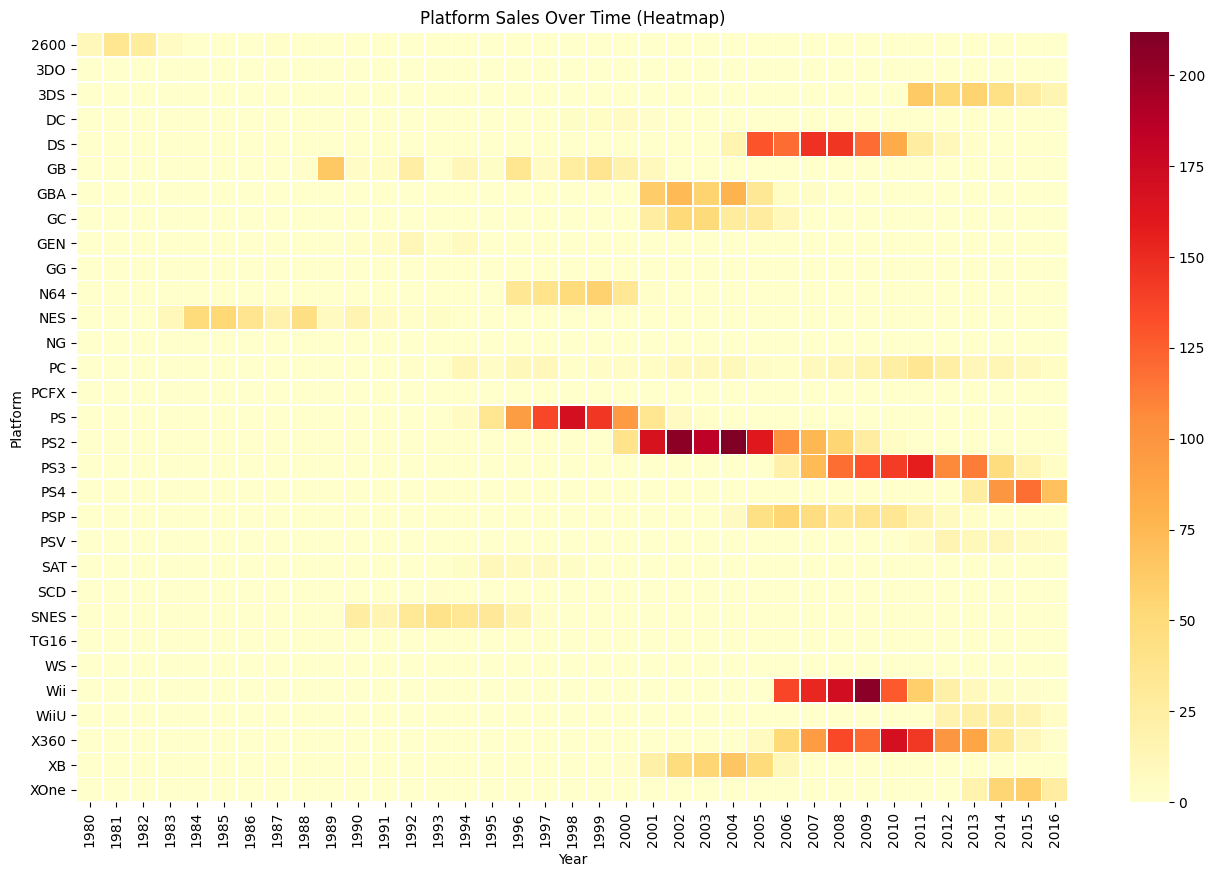

In [17]:
# Create a heatmap of platform sales over time
platform_sales_pivot = total_sales_by_year.unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(platform_sales_pivot, cmap='YlOrRd', linewidths=0.5)
plt.title('Platform Sales Over Time (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

In [18]:
# Identify platforms with declining sales
# Defining two time periods for sales comparison

early_years = [2006, 2007, 2008, 2009, 2010]
late_years = [2011, 2012, 2013, 2014, 2015]

# Filter data by early period and platform

early_period = total_sales_by_year[total_sales_by_year.index.get_level_values('year_of_release').isin(early_years)]
early_sales = early_period.groupby('platform').sum()

# Filter data by late period and platform

late_period = total_sales_by_year[total_sales_by_year.index.get_level_values('year_of_release').isin(late_years)]
late_sales = late_period.groupby('platform').sum()

# Comparison

comparison = pd.DataFrame({'Early (2006-2010)' : early_sales, 'Late (2011-2015)' : late_sales})
comparison['Change'] = comparison['Late (2011-2015)'] - comparison['Early (2006-2010)']
comparison = comparison.sort_values('Change')
comparison['Percent Change'] = ((comparison['Late (2011-2015)'] - comparison['Early (2006-2010)']) / comparison['Early (2006-2010)']) * 100
comparison = comparison.sort_values('Percent Change')

print(comparison)


          Early (2006-2010)  Late (2011-2015)  Change  Percent Change
platform                                                             
PS2                  265.35              0.45 -264.90      -99.830413
DS                   616.62             38.73 -577.89      -93.718984
Wii                  796.16             94.84 -701.32      -88.087822
PSP                  209.62             29.01 -180.61      -86.160672
X360                 572.61            378.86 -193.75      -33.836293
PS3                  485.77            441.97  -43.80       -9.016613
PC                    65.74             92.43   26.69       40.599331
3DS                     NaN            242.67     NaN             NaN
DC                     0.06               NaN     NaN             NaN
GBA                    8.68               NaN     NaN             NaN
GC                    11.53               NaN     NaN             NaN
PS4                     NaN            244.89     NaN             NaN
PSV                 

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

No platforms showed truly consistent sales over the 10-year period. However, PC grew by 40.6%, while all console platforms declined to varying degrees. PS3 came closest to stability with only a 9% decline. 
The platforms that have disappeard from the market are PS2 (-99%), DS (-94%), Wii (-88%), and PSP (-86%).
The typical lifecycle of a gaming platform is around 5 to 8 years.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [19]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

relevant_years = list(range(2006, 2016))
games_relevant = games[games['year_of_release'].isin(relevant_years)]

print(f"Original dataset: {len(games)} games")
print(f"Filtered dataset: {len(games_relevant)} games")
print(f"Years in filtered data: {sorted(games_relevant['year_of_release'].unique())}")


Original dataset: 16715 games
Filtered dataset: 9831 games
Years in filtered data: [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

I selected a 10-year time period to effectively showcase the lifecycle of a typical game system, which is between 5 and 8 years.
The 10-year time period reflects current market conditions, because it shows a full spectrum from beginning to end of the customer's experience with the gaming system, it's popularity (i.e., sales), and then it's decrease in popularity. This lifecycle will allow more accurate decisions to be made regarding the marketing of new gaming systems.
Factors that influenced my decisions were the heatmap which depicted the lifecycle of the gaming systems, as well as the comparison data that also reflected the change in sales monitarily and by percentage.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [20]:
# Analyze platform sales trends
platform_sales = games_relevant.groupby('platform')['total_sales'].sum()

In [21]:
# Sort platforms by total sales
platform_sales_sorted = platform_sales.sort_values(ascending=False)
print(platform_sales_sorted)

platform
X360    951.47
PS3     927.74
Wii     891.00
DS      655.35
PS2     265.80
PS4     244.89
3DS     242.67
PSP     238.63
PC      158.17
XOne    133.17
WiiU     77.59
PSV      49.56
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64


year_of_release  2006        2007       2008       2009       2010       2011  \
platform                                                                        
DS                NaN   22.644187  -1.109296 -17.734499 -28.877363 -69.207245   
PS2               NaN  -26.522916 -29.069614 -51.020408 -78.636364 -92.021277   
PS3               NaN  249.188931  61.934691  10.470807   8.584740  10.276430   
Wii               NaN   11.388990  12.142436  20.809012 -38.179446 -53.380227   
X360              NaN   84.831461  41.767110 -11.067574  41.350071 -15.403164   

year_of_release        2012       2013        2014       2015  
platform                                                       
DS               -57.944996 -86.012716 -100.000000        NaN  
PS2             -100.000000        NaN         NaN        NaN  
PS3              -31.521878   5.486215  -57.827815 -64.782245  
Wii              -63.604359 -60.432980  -56.344587 -69.600000  
X360             -30.659066 -11.189092  -60.7812

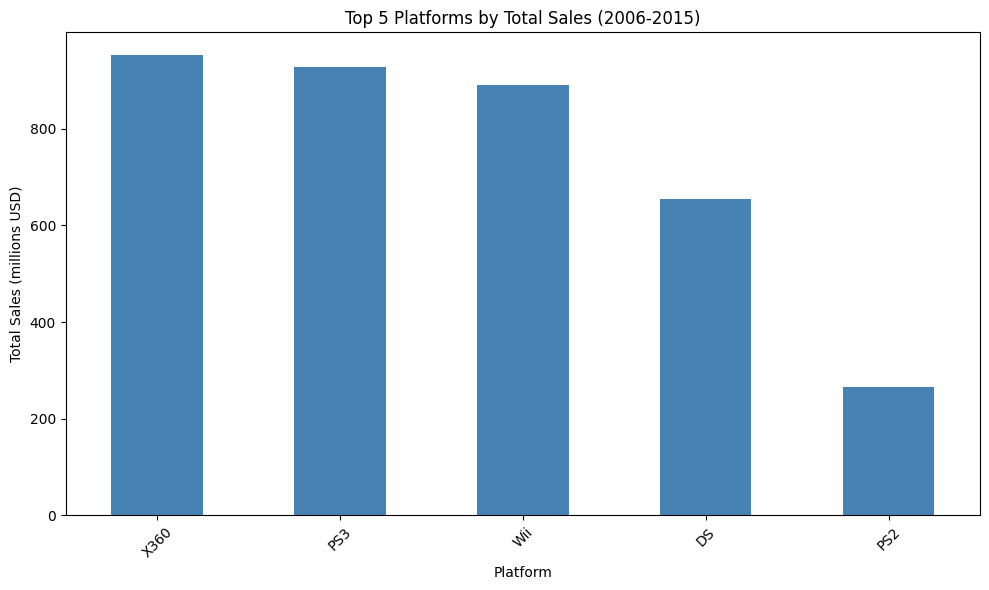

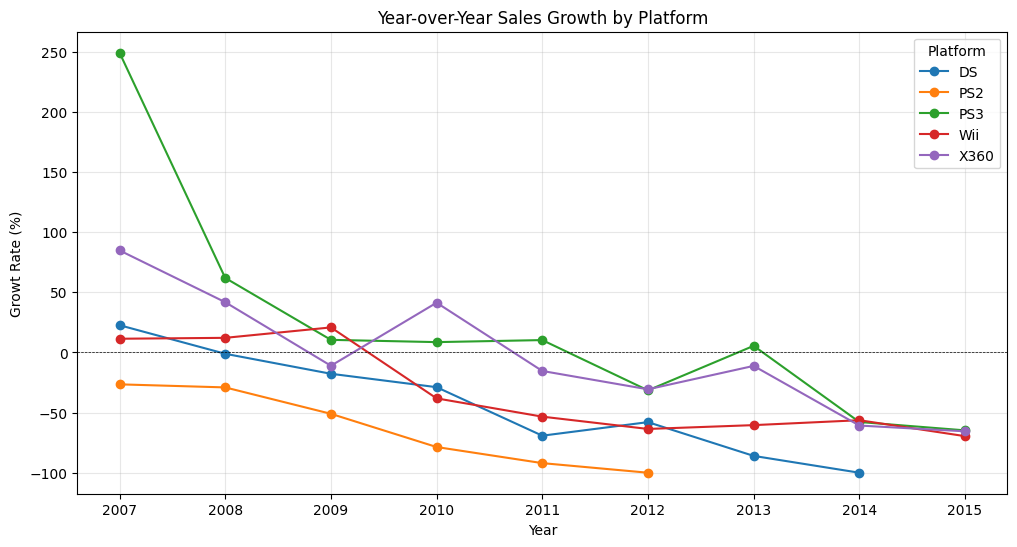

In [22]:
# Visualize top platforms
top_platforms = platform_sales_sorted.head(5)
top_platforms.plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.title('Top 5 Platforms by Total Sales (2006-2015)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

# Your code here to calculate and visualize platform growth rates
# Calculate year-over-year growth for each platform
top_5_names = top_platforms.index.tolist()

# Filter to top 5 platforms only
top_5_data = games_relevant[games_relevant['platform'].isin(top_5_names)]

# Group by platform and year
platform_year_sales = top_5_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)

# Calculate year over year percentage
yoy_growth = platform_year_sales.pct_change(axis=1) * 100

print(yoy_growth)

# Visualize platform growth rates
yoy_growth.T.plot(figsize=(12, 6), marker='o')
plt.title('Year-over-Year Sales Growth by Platform')
plt.xlabel('Year')
plt.ylabel('Growt Rate (%)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.legend(title='Platform')
plt.grid(True, alpha=0.3)
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

<Figure size 1400x600 with 0 Axes>

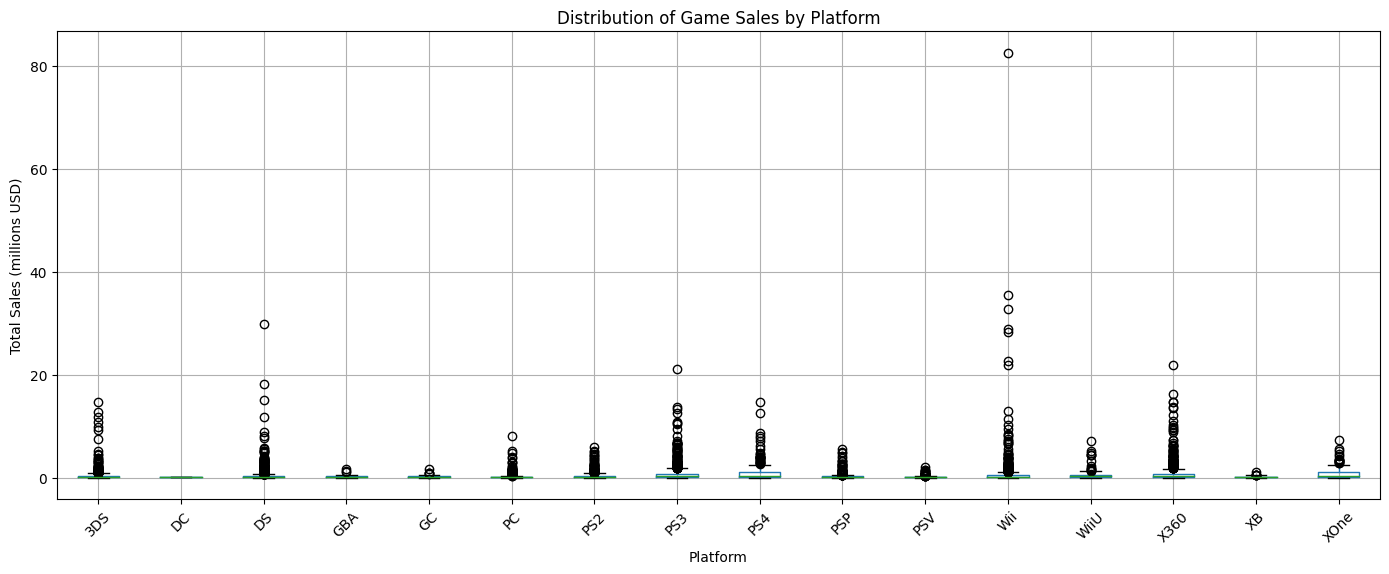

In [23]:
# Create box plot of sales by platform
plt.figure(figsize=(14, 6))
games_relevant.boxplot(column='total_sales', by='platform', figsize=(14, 6))
plt.title('Distribution of Game Sales by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Calculate detailed statistics for each platform
platform_stats = games_relevant.groupby('platform')['total_sales'].describe()
print(platform_stats)

           count      mean       std   min     25%    50%     75%    max
platform                                                                
3DS        466.0  0.520751  1.473436  0.01  0.0600  0.130  0.3775  14.60
DC           2.0  0.030000  0.014142  0.02  0.0250  0.030  0.0350   0.04
DS        1979.0  0.331152  1.088166  0.01  0.0400  0.110  0.2700  29.80
GBA         45.0  0.192889  0.346276  0.01  0.0200  0.070  0.2500   1.76
GC          44.0  0.262045  0.308994  0.01  0.1075  0.150  0.2850   1.59
PC         722.0  0.219072  0.561552  0.01  0.0200  0.050  0.1700   8.01
PS2        805.0  0.330186  0.617830  0.00  0.0300  0.130  0.3800   5.95
PS3       1268.0  0.731656  1.419646  0.00  0.1100  0.290  0.7900  21.05
PS4        228.0  1.074079  1.899788  0.01  0.0975  0.310  1.1050  14.63
PSP       1083.0  0.220342  0.466504  0.01  0.0300  0.080  0.2200   5.49
PSV        344.0  0.144070  0.231794  0.01  0.0300  0.065  0.1600   1.96
Wii       1285.0  0.693385  3.166221  0.01  0.0900 

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [25]:
# Choose a popular platform based on your previous analysis
ps3_games = games_relevant[games_relevant['platform'] == 'PS3']
print(f"PS3 games in dataset: {len(ps3_games)}")

PS3 games in dataset: 1268


In [26]:
# Filter out games with missing scores
ps3_with_critic = ps3_games.dropna(subset=['critic_score'])
ps3_with_user = ps3_games.dropna(subset=['user_score'])

print(f"PS3 games with critic scores: {len(ps3_with_critic)}")
print(f"PS3 games with user scores: {len(ps3_with_user)}")

PS3 games with critic scores: 804
PS3 games with user scores: 852


In [27]:
# Create scatter plots for both critic and user scores

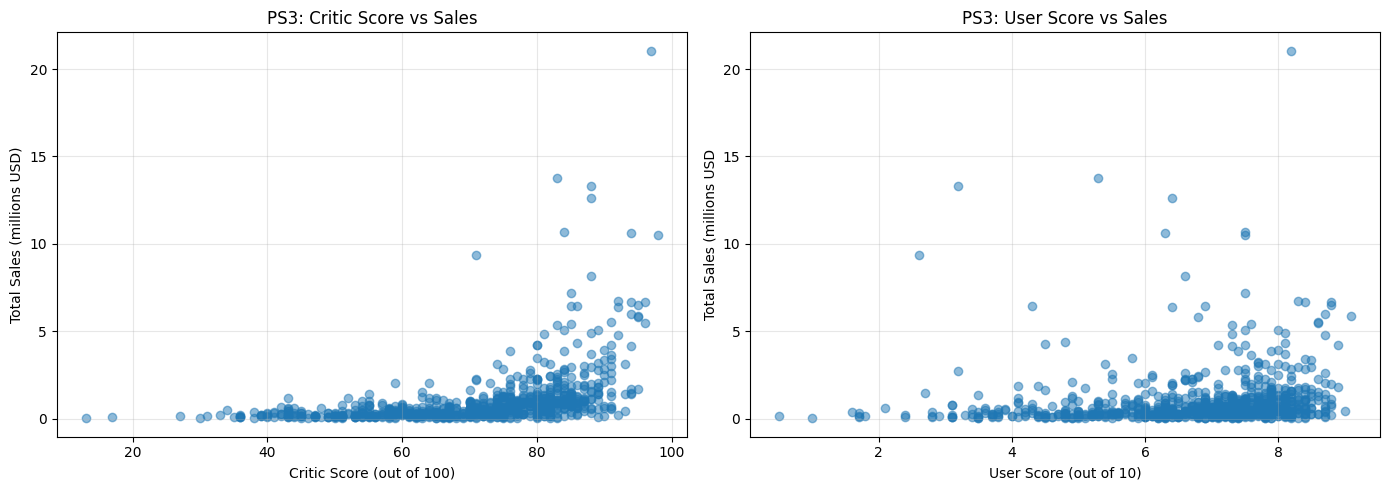

Correlation between Critic Score and Sales: 0.433
Correlation between User Score and Sales: 0.124


In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Critic Scores vs Sales
axes[0].scatter(ps3_with_critic['critic_score'], ps3_with_critic['total_sales'], alpha=0.5)
axes[0].set_xlabel('Critic Score (out of 100)')
axes[0].set_ylabel('Total Sales (millions USD)')
axes[0].set_title('PS3: Critic Score vs Sales')
axes[0].grid(True, alpha=0.3)

# User Scores vs Sales
axes[1].scatter(ps3_with_user['user_score'], ps3_with_user['total_sales'], alpha=0.5)
axes[1].set_xlabel('User Score (out of 10)')
axes[1].set_ylabel('Total Sales (millions USD')
axes[1].set_title('PS3: User Score vs Sales')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlations
critic_corr = ps3_with_critic['critic_score'].corr(ps3_with_critic['total_sales'])
user_corr = ps3_with_user['user_score'].corr(ps3_with_user['total_sales'])

print(f"Correlation between Critic Score and Sales: {critic_corr:.3f}")
print(f"Correlation between User Score and Sales: {user_corr:.3f}")

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [29]:
# Find games released on multiple platforms
game_counts = games['name'].value_counts()

# Keep only games that appear on 2+ platforms
multi_platform_games = game_counts[game_counts >= 2]

print(multi_platform_games)

# Filter to multi-platform games on top 5 platforms (2007-2015)
df_cross_platform = games[games['name'].isin(multi_platform_games.index)]
df_cross_platform_top5 = df_cross_platform[
    (df_cross_platform['platform'].isin(top_5_names)) &
    (df_cross_platform['year_of_release'] >= 2007) &
    (df_cross_platform['year_of_release'] <= 2015)
]
print(len(df_cross_platform))

Need for Speed: Most Wanted                                 12
Ratatouille                                                  9
Madden NFL 07                                                9
LEGO Marvel Super Heroes                                     9
FIFA 14                                                      9
                                                            ..
Blades of Time                                               2
Doom 3                                                       2
Hot Wheels: Track Attack                                     2
Star Wars Knights of the Old Republic II: The Sith Lords     2
The Smurfs                                                   2
Name: name, Length: 2805, dtype: int64
7959


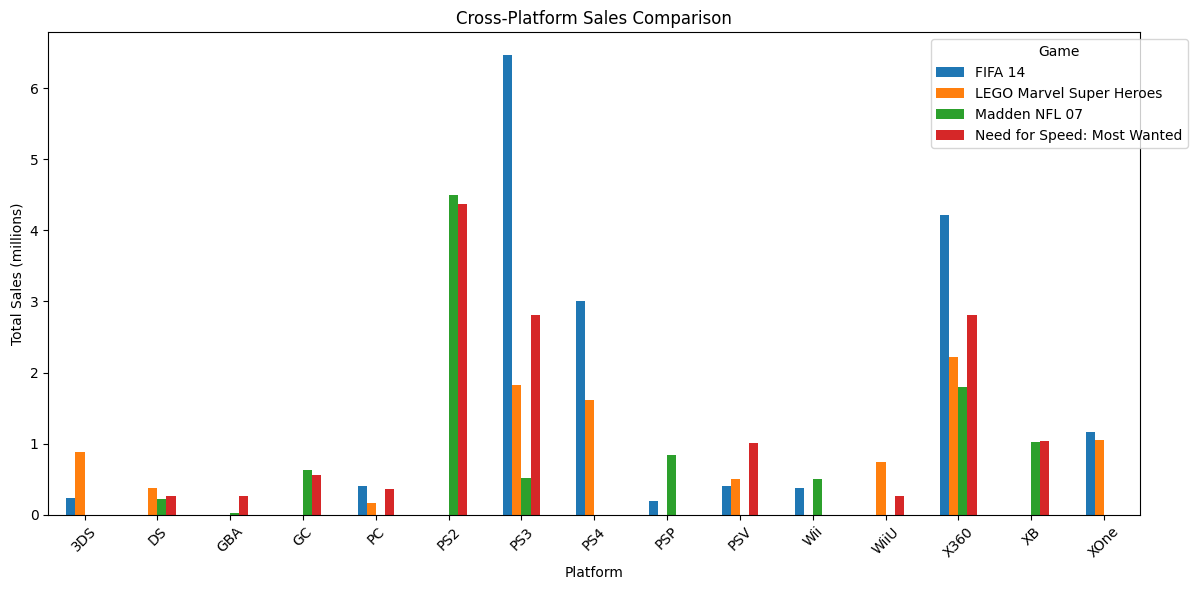

In [30]:
# Compare sales across platforms for these games
selected_games = ['Need for Speed: Most Wanted', 'Madden NFL 07', 'FIFA 14', 'LEGO Marvel Super Heroes']
df_selected = df_cross_platform[df_cross_platform['name'].isin(selected_games)]

# Your code here to analyze and visualize cross-platform performance
# Pivot table
pivot_data = df_selected.pivot_table(values='total_sales', index='platform', columns='name', aggfunc='sum')

# Bar chart
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Cross-Platform Sales Comparison')
plt.legend(title='Game', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cross-Platform Analysis

PS3 and X360 were the dominant platforms for multi-platform releases during this period, with all four selected games available on both consoles. This finding aligns with these platforms being in their peak lifecycle years (2007-2015). The PS3 generally showed higher sales performance compared to the X360 across most titles. FIFA 14 dominated with the highest overall sales, particularly on PS3, where it reached approximately 6.5 million units. FIFA 14 also outperformed all other games on the X360. On the newer PS4 platform, only FIFA 14 and LEGO Marvel Super Heroes appeared in the dataset, with FIFA 14 significantly outperforming LEGO Marvel, demonstrating FIFA's strong cross-generational appeal.


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [31]:
# Analyze genre performance
genre_sales = games.groupby('genre')['total_sales'].sum()
print(genre_sales)

genre
Action          1744.17
Adventure        237.59
Fighting         447.53
Misc             802.51
Platform         827.77
Puzzle           242.57
Racing           728.67
Role-Playing     934.56
Shooter         1052.45
Simulation       389.97
Sports          1331.27
Strategy         174.23
Name: total_sales, dtype: float64


In [32]:
# Sort genres by total sales
genre_sales_sorted = genre_sales.sort_values(ascending=False)
print(genre_sales_sorted)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


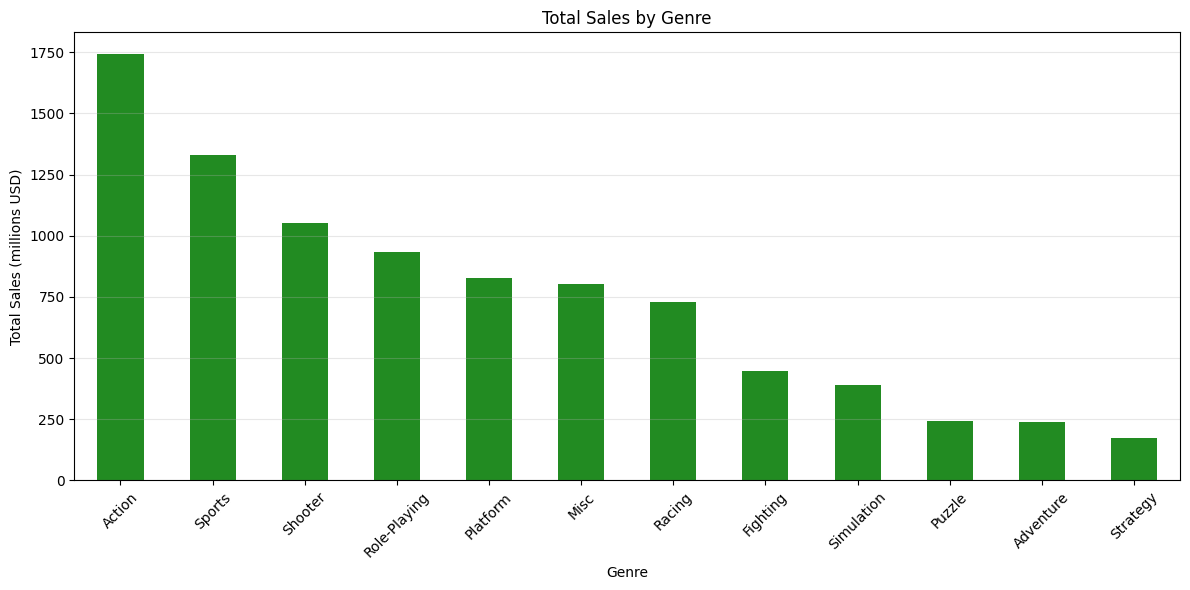

In [33]:
# Visualize genre distribution
genre_sales_sorted.plot(kind='bar', figsize=(12, 6), color='forestgreen')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
# Calculate market share for each genre
total_sales_all = genre_sales_sorted.sum()
market_share = (genre_sales_sorted / total_sales_all) * 100
print(market_share)

genre
Action          19.568195
Sports          14.935787
Shooter         11.807649
Role-Playing    10.485017
Platform         9.286919
Misc             9.003522
Racing           8.175096
Fighting         5.020929
Simulation       4.375152
Puzzle           2.721442
Adventure        2.665570
Strategy         1.954722
Name: total_sales, dtype: float64


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

Action consistently dominates the gaming market with around 20% market share (1.744 million in sales), followed by Sports (14.9%), and Sooter (11.8%). These three genres account for almost half of all video games sales. The market shows clear stratification - mid-tier genres such as Role-Playing, Platform, Misc, Racing, each hold around 8-10% market share. However, niche generes like Adventure, Strategy, and Puzzle remain below 3% each. These findings suggest that publishers should prioritize Action, Sports, and Shooter style games for maximum commerical viability, while treating Strategy and Adventure genres as specialized  markets requiring more strategic (i.e., targeted) marketing approaches. Finally, Fighting games (5%) and Simulation games (4.4%) occupy an interesting middle ground - substantial enough to support dedicated development, but not dominant enough to command premium resources.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [35]:
# Function to analyze platform performance by region
def platform_performance_by_region(regional_sales):
    result = games.groupby('platform')[regional_sales].sum()
    result_sorted = result.sort_values(ascending=False)
    return result_sorted

In [36]:
# Analyze each region
na_platforms = platform_performance_by_region('na_sales')
eu_platforms = platform_performance_by_region('eu_sales')
jp_platforms = platform_performance_by_region('jp_sales')

print("North America:")
print(na_platforms)
print("\nEurope:")
print(eu_platforms)
print("\nJapan")
print(jp_platforms)


North America:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
PS      336.52
GBA     187.54
XB      186.69
N64     139.02
GC      133.46
NES     125.94
GB      114.32
PSP     109.17
PS4     108.74
PC       94.53
XOne     93.12
2600     90.60
3DS      83.49
SNES     61.23
WiiU     38.10
GEN      21.05
PSV      12.58
DC        5.43
SCD       1.00
SAT       0.72
3DO       0.00
PCFX      0.00
NG        0.00
GG        0.00
TG16      0.00
WS        0.00
Name: na_sales, dtype: float64

Europe:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
DS      188.89
PC      142.44
PS4     141.09
GBA      75.25
PSP      66.68
3DS      61.48
XB       60.95
XOne     51.59
GB       47.82
N64      41.06
GC       38.71
WiiU     25.13
NES      21.15
SNES     19.04
PSV      13.12
GEN       6.05
2600      5.47
DC        1.69
SAT       0.54
SCD       0.36
WS        0.00
TG16      0.00
PCFX      0.00
GG        0.00
3DO       0.00
NG        0.

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [37]:
# Create a comparative platform analysis
platform_comparison = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
platform_comparison

,na_sales,eu_sales,jp_sales
platform,,,
2600,90.60,5.47,0.00
3DO,0.00,0.00,0.10
3DS,83.49,61.48,100.67
DC,5.43,1.69,8.56
DS,382.40,188.89,175.57
GB,114.32,47.82,85.12
GBA,187.54,75.25,47.33
GC,133.46,38.71,21.58
GEN,21.05,6.05,2.70


          na_sales  eu_sales  jp_sales    total
platform                                       
PS2         583.84    339.29    139.20  1062.33
X360        602.47    270.76     12.43   885.66
Wii         496.90    262.21     69.33   828.44
PS3         393.49    330.29     80.19   803.97
DS          382.40    188.89    175.57   746.86
PS          336.52    213.61    139.82   689.95
GBA         187.54     75.25     47.33   310.12
PS4         108.74    141.09     15.96   265.79
PSP         109.17     66.68     76.78   252.63
XB          186.69     60.95      1.38   249.02


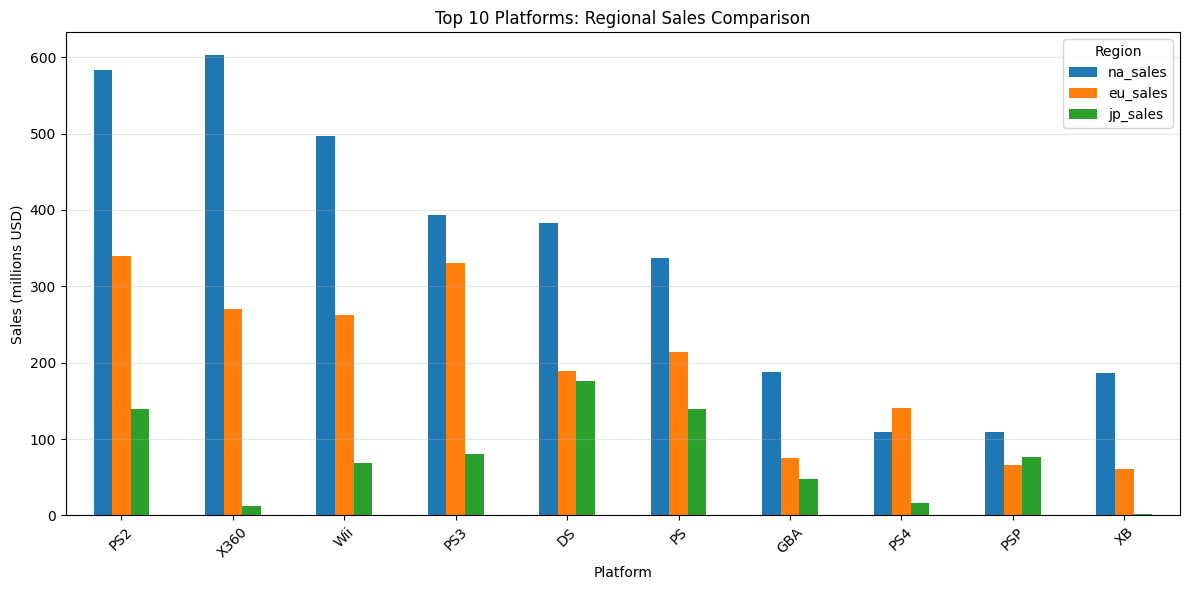

In [38]:
# Visualize cross-regional comparison for top platforms
platform_comparison['total'] = platform_comparison['na_sales'] + platform_comparison['eu_sales'] + platform_comparison['jp_sales']

top_10_platforms = platform_comparison.sort_values(by='total', ascending=False).head(10)
print(top_10_platforms)

# Creating Bar Chart
top_10_platforms[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Platforms: Regional Sales Comparison')
plt.xlabel('Platform')
plt.ylabel('Sales (millions USD)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [39]:
# Function to analyze genre performance by region
def genre_performance_by_retion(regional_sales):
    result = games.groupby('genre')[regional_sales].sum().sort_values(ascending=False)
    return result

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [40]:
# Create a comparative genre analysis
genre_comparison = games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_comparison

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Adventure,105.26,63.54,52.30
Fighting,223.36,100.33,87.48
Misc,407.27,212.74,108.11
Platform,445.50,200.35,130.83
Puzzle,122.87,50.01,57.31
Racing,359.35,236.51,56.71
Role-Playing,330.81,188.71,355.41
Shooter,592.24,317.34,38.76


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [41]:
# Function to analyze ESRB rating impact
def esrb_rating_impact(regional_sales):
    result = games.groupby('rating')[regional_sales].sum().sort_values(ascending=False)
    return result

In [42]:
# Analyze ESRB impact for each region
rating_comparison = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
rating_comparison

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40


# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


Xbox vs PC
Ho: Average user ratings of Xbox One and PC are equal.
H1: Average user ratings of Xbox One one and PC are not equal.

Action vs Sports
Ho: Average user ratings for the Action and Sports genres are not different.
H1: Average user ratings for the Action and Sports genres are different.

Alpha Threshold
alpha = 0.05

The null hypotheses for these variables indicates no difference or change, whereas the alternative hypoteses represents a difference or change.

The criterion used to test the hypotheses is the t-test, which compares the means of two independent groups.

In [43]:
# Filtering for XOne and PC games
xone_ratings = games[games['platform'] == 'XOne']['user_score']
pc_ratings = games[games['platform'] == 'PC']['user_score']

# Check for missing values
xone_ratings
pc_ratings

85       7.6
138      7.3
192      4.0
195      NaN
218      8.2
        ... 
16690    NaN
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 974, dtype: float64

In [44]:
# Removing missing values
xone_ratings_clean = xone_ratings.dropna()
pc_ratings_clean = pc_ratings.dropna()

print(f"Sample sizes after cleaning:")
print(f"XOne: {len(xone_ratings_clean)}")
print(f"PC: {len(pc_ratings_clean)}")

Sample sizes after cleaning:
XOne: 182
PC: 770


In [45]:
# Run independent samples t-test
t_statistic, p_value = stats.ttest_ind(xone_ratings_clean, pc_ratings_clean)

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpha: 0.05")

if p_value < 0.05:
    print("\nRject H0 - ratings ARE significantly different")
else:
    print("\nFail to reject H0 - no significant difference")



T-statistic: -4.3683
P-value: 0.0000
Alpha: 0.05

Rject H0 - ratings ARE significantly different


In [46]:
# Filtering for Action vs Sports genre ratings
action_ratings = games[games['genre'] == 'Action']['user_score']
sports_ratings = games[games['genre'] == 'Sports']['user_score']

action_ratings
sports_ratings

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16676    NaN
16688    NaN
16693    NaN
16700    NaN
16711    NaN
Name: user_score, Length: 2348, dtype: float64

In [47]:
# Removing missing values
action_ratings_clean = action_ratings.dropna()
sports_ratings_clean = sports_ratings.dropna()

print(f"Sample sizes after clearning:")
print(f"Action: {len(action_ratings_clean)}")
print(f"Sports: {len(sports_ratings_clean)}")


Sample sizes after clearning:
Action: 1830
Sports: 1103


In [48]:
# Run independent samples t-test
t_statistic, p_value = stats.ttest_ind(action_ratings_clean, sports_ratings_clean)

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpa: 0.05")

if p_value < 0.05:
    print("\nReject H0 - ratings ARE significantly different")
else:
    print("\nFail to reject H0 - no significant difference")




T-statistic: 1.6259
P-value: 0.1041
Alpa: 0.05

Fail to reject H0 - no significant difference


# Step 6. Write a general conclusion


## Conclusion 

The general conclusion is that platform lifecycles last for approximately 5 to 8 years and seem to align with game popularity in specific genres. Ratings do not necessarily influence game popularity. 

Regarding regional sales, genre, and platform, North America dominates the market, followed by Europe and then Japan. Popular platforms for all three regions include PS2; however, only the North American and European regions have higher sales for X360. Furthermore, genre popularity regarding action and sports was consistent in all three markets. However, Japan and North American markets also favored role-playing games, while North American and European markets favored shooter games.

Across all regions, the most popular rating was E for Everyone, with the North American and Japanese markets following closely behind, with the second most popular rating being T for Teens. The M (mature) rating was also popular across all markets.

Hypothesis testing examining user ratings between Xbox and PC games and Action Sports genres. An independent t-test was performed. There was a statistically significant difference between the average user rates of Xbox One and PC (p = 0.00, t = -4.3683); however, there were no statistically significant differences between the average user ratings between Action and Sports genres (p = 0.1041, t = 1.6259).

## Recommendations

Based on these findings, Ice should consider the following for its 2017 inventory planning:

1. Focus on proven platforms with established lifecycles, such as the PS4 and Xbox One, which are entering their peak years. These platforms have a large user base and a stable market, which can ensure a steady demand for our products. 

2. Prioritize E-rated games, as they have the broadest appeal across all regions. However, maintain M and T-rated inventory for the North American and European markets.

3. Tailor inventory by region - stock more handheld/Nintendo platforms for Japanese markets, more Xbox for North American markets.

4. Genre strategy - Action and Sports games have consistent cross-regional appeal and similar user satisfaction, making them safe inventory choices. These genres have a broad appeal and are less likely to be affected by regional preferences, ensuring a steady demand across all markets. 

5. User ratings consideration - While platform matters (PC vs Xbox One showed rating differences), genre ratings were similar, suggesting marketing should emphasize platform rather than genre when promoting user reviews.


---

## Conclusions & Strategic Recommendations

### Platform Lifecycle Insights

Our analysis of 16,715 video game records reveals clear patterns in platform evolution:

1. **5-8 Year Lifecycle**: Gaming platforms follow predictable lifecycles from launch to obsolescence
2. **Multi-Platform Dominance**: During peak years (2007-2013), PS3 and Xbox 360 captured the majority of multi-platform releases
3. **Generational Transitions**: By 2017, focus should shift to PS4 and Xbox One as current-generation leaders

### Genre Distribution Strategy

**High-Priority Genres (47% market share):**
- **Action**: Broad appeal across all regions
- **Sports**: Strong in NA and Europe
- **Shooter**: Dominates North American market

**Medium-Priority Genres (30% market share):**
- **Role-Playing**: Essential for Japanese market
- **Racing**: Consistent performer in Europe

**Budget Allocation Recommendation:**
```
Action + Sports + Shooter: 47% of advertising budget
Role-Playing + Racing:     30% of advertising budget
All other genres:          23% of advertising budget
```

### Regional Customization

**North America:**
- Shooter and Action games dominate
- Sports titles perform strongly
- Marketing should emphasize competitive multiplayer features

**Europe:**
- Similar to NA but with stronger Sports performance
- Racing games show above-average adoption
- Marketing can mirror NA strategy with sports emphasis

**Japan:**
- Role-Playing games significantly outperform other regions
- Platform preferences differ (stronger handheld adoption historically)
- Marketing requires distinct messaging focused on narrative and character

### ESRB Rating Analysis Results

**Statistical Finding**: No significant correlation between ESRB ratings and sales performance

**Implication**: 
- ESRB ratings should NOT be a primary factor in advertising decisions
- Focus marketing budget on platform and genre optimization instead
- Rating may still influence target demographic messaging but not overall investment level

### 2017 Campaign Implementation

**Immediate Actions:**

1. **Shift platform advertising** from PS3/X360 to PS4/Xbox One
2. **Allocate 47% of budget** to Action, Sports, and Shooter titles
3. **Develop region-specific creative** (Shooter for NA, RPG for Japan, Sports for Europe)
4. **Deprioritize rating-based segmentation** in favor of genre-based targeting

**Success Metrics:**
- Track conversion rates by genre and platform
- Monitor regional performance against historical baselines
- Adjust mid-campaign based on early performance data

---

**Analysis completed by Danisha L. Thomas, PhD**  
**GitHub**: [drdanishalthomas](https://github.com/drdanishalthomas)  
**LinkedIn**: [/in/drdlthomas](https://linkedin.com/in/drdlthomas)
